In [2]:
import pandas as pd
from datetime import datetime, timedelta
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling as pp
import random 
import math


In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as xgb
#model selection
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE

In [7]:
data = pd.read_csv('../data/processed_data_10k.csv')

In [9]:
data.head()

,State_of_Charge,State_of_Health,Voltage,Current,Temperature,Cycling_Count,Internal_Resistance,Rate_of_Charge,Charge_Discharge_Efficiency,Depth_of_Discharge,...,Electrolyte_Type,Charging_Infrastructure,Road_Type,Driving_Pattern,Weather_Conditions,Battery_Chemistry,Truck_Model,Trailer_Attached,Driver_Experience,Battery_Class
0,0.736262,0.958940,388.594502,43.794469,81.549632,871.118450,2.612143,0.561799,0.877159,0.296573,...,2,2,2,1,1,0,1,0,1,1
1,0.708948,-9.981637,409.439222,45.009220,73.737849,762.316683,2.304446,0.596076,0.849265,0.365167,...,2,1,0,0,0,0,1,1,1,0
2,0.789920,0.867695,394.786469,44.798618,81.689676,433.496125,2.733501,0.492585,0.824552,0.294090,...,1,0,2,1,0,3,1,0,1,1
3,0.850362,0.896364,387.264498,26.186301,118.124851,767.154933,2.963926,0.501017,0.876679,0.317833,...,0,2,2,2,1,0,1,1,0,0
4,0.648682,0.817875,389.835273,45.014641,98.523220,736.026308,2.633789,0.514200,0.863097,0.247701,...,1,0,2,1,0,2,1,1,0,0


In [8]:
data.select_dtypes(include=['object'])

""
0
1
2
3
4
...
9995
9996
9997
9998


### Considering only top 15 features given by RFE 

In [10]:
important_feats = ['Voltage', 'Current', 'Charge_Discharge_Efficiency', 'Charge_Rate', 'Voltage_Sag', 'EIS_Data', 'Cycle_Life', 
                 'Chemical_Composition', 'Rate_of_Charge_Peak', 'Tire_Pressure', 'Regenerative_Braking', 'Idle_Time',
                 'Charging_Time', 'Payload_Distribution', 'Acceleration','Battery_Class']

In [11]:
featured_df = data[important_feats]

In [12]:
X = featured_df.iloc[:,:-1]
y = featured_df.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]

In [15]:
#Logging for visual comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [18]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = roc_auc_score(y_test, train_predictions)
    print("AUC ROC Score: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    # log = log.append(log_entry)
    log = pd.concat([log,log_entry])
    
print("="*30)


d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
****Results****
AUC ROC Score: 49.6690%
Log Loss: 0.6871267936043894
KNeighborsClassifier
****Results****
AUC ROC Score: 50.0211%
Log Loss: 5.152545576062282
SVC
****Results****
AUC ROC Score: 50.0000%
Log Loss: 0.6866083990816014
DecisionTreeClassifier
****Results****
AUC ROC Score: 51.8627%
Log Loss: 17.24688814669255
RandomForestClassifier
****Results****
AUC ROC Score: 51.7026%
Log Loss: 0.6905184980359729
XGBClassifier
****Results****
AUC ROC Score: 51.5163%
Log Loss: 0.7719882930058685
AdaBoostClassifier
****Results****
AUC ROC Score: 49.3854%
Log Loss: 0.6934052120650755
GradientBoostingClassifier
****Results****
AUC ROC Score: 49.5297%
Log Loss: 0.6938510134518961
GaussianNB
****Results****
AUC ROC Score: 51.6990%
Log Loss: 0.7309826927422858


d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


### None of the ML model has given a good auc roc score, maybe due to the dummy data models are no able seperate the targets. 

In [19]:
log1 = log.sort_values(by='Accuracy',ascending=False)
log2 = log.sort_values(by='Log Loss')

C:\Users\rohit\AppData\Local\Temp\ipykernel_14784\3784688423.py:2: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))


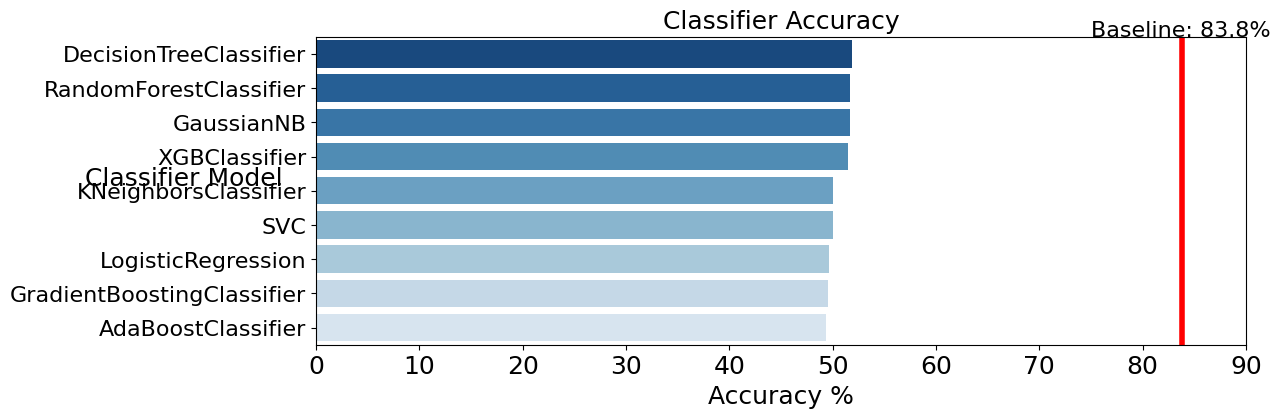

C:\Users\rohit\AppData\Local\Temp\ipykernel_14784\3784688423.py:14: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))


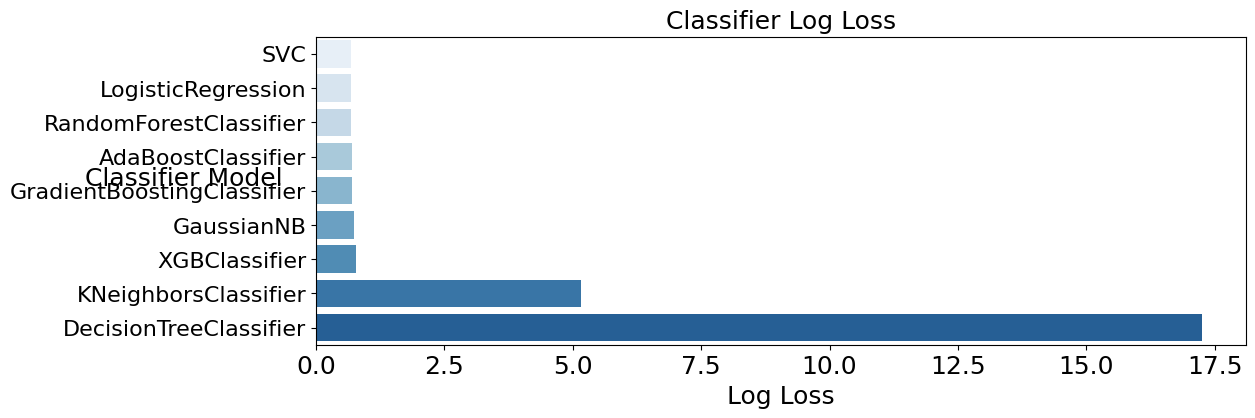

In [20]:
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Accuracy', y='Classifier', data=log1, palette=sns.color_palette("Blues_r", n_colors=len('classifier')))
plt.xlabel('Accuracy %', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
fig.set_xticks(ticks=[0,10,20,30,40,50,60,70,80,90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Accuracy', fontsize=18)
plt.axvline(83.8, 0,1, lw=4, color='red')
plt.annotate(xy=(75,-0.5), fontsize=16, color='black', text='Baseline: 83.8%')
plt.show()
plt.figure(figsize=(12,4))
fig = sns.barplot(x='Log Loss', y='Classifier', data=log2, palette=sns.color_palette("Blues", n_colors=len('Classifier')))
plt.xlabel('Log Loss', fontsize=18)
plt.ylabel('Classifier Model',fontsize=18, position=(0,1),rotation=0)
fig.yaxis.labelpad= -125
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title('Classifier Log Loss', fontsize=18)
plt.show()

## Among the selected models, Random Forest and XGboosting are still outperforming everyone, let's train them individually 

In [21]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
param_grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7],
    'min_samples_split': [0.025, 0.05], 
    'min_samples_leaf':[0.025,0.05],
    'bootstrap': [True]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\base.py"

{'bootstrap': True, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 0.025, 'min_samples_split': 0.025, 'n_estimators': 100}


In [24]:
#Selecting tunned hyperparameter
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt',n_estimators=100, oob_score = True, bootstrap=True,
                             max_depth=3, min_samples_split=0.025,min_samples_leaf = 0.05) 

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=0.05,
                       min_samples_split=0.025, n_jobs=-1, oob_score=True)

In [26]:
rfc_y_pred = rfc.predict(X_test)

In [27]:
print(classification_report(rfc_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      2000

    accuracy                           0.56      2000
   macro avg       0.50      0.28      0.36      2000
weighted avg       1.00      0.56      0.72      2000



d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\workspace\ml_projects\battery_classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [28]:
## XGBoosting Classifier

In [29]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [30]:
model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [10,20,50],
    'colsample_bytree': [0.7,0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)


print(model.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 10, 'reg_alpha': 1.1, 'reg_lambda': 1.3, 'subsample': 0.8}


In [31]:
xgb_model = xgb.XGBClassifier(colsample_bytree= 0.8, max_depth= 15, n_estimators= 10, reg_alpha= 1.1, reg_lambda= 1.3, subsample= 0.8)

In [32]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
xgb_y_pred = xgb_model.predict(X_test)

In [34]:
print(confusion_matrix(xgb_y_pred,y_test))

[[347 441]
 [532 680]]


In [35]:
print(classification_report(xgb_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.39      0.44      0.42       788
           1       0.61      0.56      0.58      1212

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.52      0.51      0.52      2000



In [37]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)


In [38]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [39]:
G_pred = gsearch1.predict(X_test)

In [40]:
print(confusion_matrix(G_pred,y_test))

[[158 203]
 [721 918]]


In [41]:
print(classification_report(G_pred,y_test))

              precision    recall  f1-score   support

           0       0.18      0.44      0.25       361
           1       0.82      0.56      0.67      1639

    accuracy                           0.54      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.70      0.54      0.59      2000



In [42]:
from sklearn.ensemble import VotingClassifier

In [43]:
models = list()
models.append(('XGBoost',xgb_model))
models.append(('GradientBoost', gsearch1))

In [44]:
ensemble = VotingClassifier(estimators=models, voting='soft')

In [45]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning...
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('GradientBoost',
                              GridSearchCV(cv=5,
                                           estimator=GradientBoostingClassifier(max_depth=8,
                                                                                max_features='sqrt',
                                                                                min_samples_leaf=50,
                                                                                min_samples_split=500,
                                                                                random_state=10,
                                                                                subsample=0.8),
                                           n_jobs=4,
                                           param_grid={'n_estimators': range(20, 81, 10)},
                                           scoring='roc_auc'))],
                 voting='soft')

In [46]:
yhat = ensemble.predict(X_test)

In [47]:
print(confusion_matrix(yhat,y_test))

[[289 363]
 [590 758]]


In [48]:
print(classification_report(yhat,y_test))

              precision    recall  f1-score   support

           0       0.33      0.44      0.38       652
           1       0.68      0.56      0.61      1348

    accuracy                           0.52      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.56      0.52      0.54      2000



In [49]:
import joblib

# Save the model to a file
joblib.dump(ensemble, '../models/ensemble_model.joblib')

# Save the model to a file
joblib.dump(xgb_model, '../models/xgboost_model.joblib')


# Save the model to a file
joblib.dump(gsearch1, '../models/gb_boosting_model.joblib')

# # Load the model from the file
# loaded_model = joblib.load('linear_regression_model.joblib')

['../models/gb_boosting_model.joblib']

In [50]:
featured_df.to_csv('../data/Feature_df.csv', index=False)

In [56]:
print(featured_df.columns.to_list())

['Voltage', 'Current', 'Charge_Discharge_Efficiency', 'Charge_Rate', 'Voltage_Sag', 'EIS_Data', 'Cycle_Life', 'Chemical_Composition', 'Rate_of_Charge_Peak', 'Tire_Pressure', 'Regenerative_Braking', 'Idle_Time', 'Charging_Time', 'Payload_Distribution', 'Acceleration', 'Battery_Class']


In [57]:
X_train.columns

Index(['Voltage', 'Current', 'Charge_Discharge_Efficiency', 'Charge_Rate',
       'Voltage_Sag', 'EIS_Data', 'Cycle_Life', 'Chemical_Composition',
       'Rate_of_Charge_Peak', 'Tire_Pressure', 'Regenerative_Braking',
       'Idle_Time', 'Charging_Time', 'Payload_Distribution', 'Acceleration'],
      dtype='object')